## Required library

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


## Plotting Graph

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


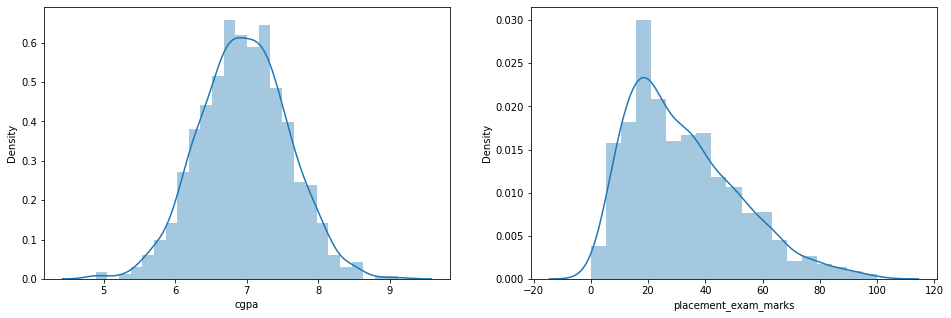

In [32]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

<AxesSubplot:xlabel='placement_exam_marks'>

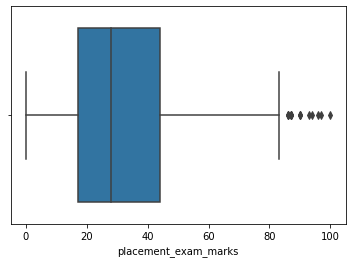

In [7]:
sns.boxplot(data=df, x='placement_exam_marks')


In [14]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [15]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [16]:
percentile25

17.0

In [17]:
percentile75

44.0

In [18]:
iqr = percentile75 - percentile25

In [19]:
iqr

27.0

In [20]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [21]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


## Finding Outliar

In [22]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [24]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


## Trimming

In [25]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [26]:
new_df.shape

(985, 3)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


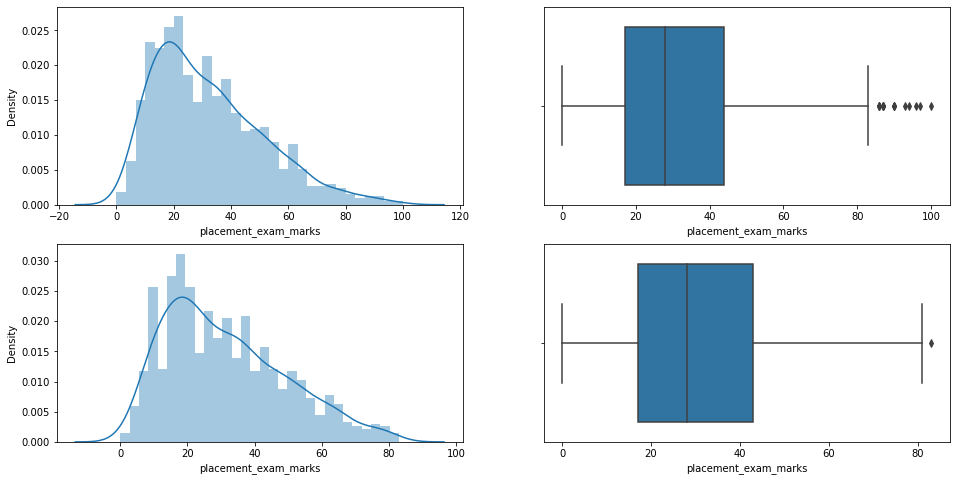

In [30]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'],kde = True, bins = 30)

plt.subplot(2,2,2)
sns.boxplot(data=df, x='placement_exam_marks')

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'],kde = True, bins = 30)

plt.subplot(2,2,4)
sns.boxplot(data = new_df, x='placement_exam_marks')

plt.show()

In [33]:
mean = df['placement_exam_marks'].mean()
std = df['placement_exam_marks'].std()
z = (df['placement_exam_marks'] - mean) / std
outliers = df[(z < -3) | (z > 3)]

In [34]:
outliers

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
134,6.33,93.0,0
162,7.80,90.0,0
324,6.64,90.0,0
630,6.56,96.0,1
730,6.14,90.0,1
846,6.99,97.0,0
917,5.95,100.0,0


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

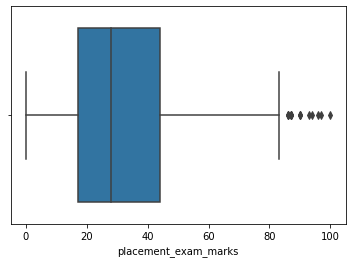

In [35]:
sns.boxplot(df['placement_exam_marks'], showfliers=True)

In [37]:
mean = df['placement_exam_marks'].mean()
std_dev = df['placement_exam_marks'].std()

z_scores = (df['placement_exam_marks'] - mean) / std_dev
outliers = df[(np.abs(z_scores) > 3)]

print(outliers)

     cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
134  6.33                  93.0       0
162  7.80                  90.0       0
324  6.64                  90.0       0
630  6.56                  96.0       1
730  6.14                  90.0       1
846  6.99                  97.0       0
917  5.95                 100.0       0


<AxesSubplot:xlabel='placement_exam_marks'>

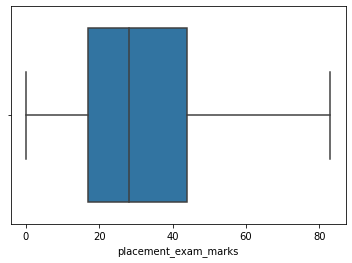

In [39]:
sns.boxplot(data=df, x='placement_exam_marks', showfliers=False)


<AxesSubplot:ylabel='placement_exam_marks'>

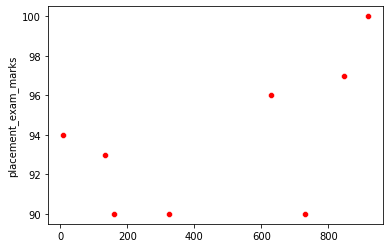

In [40]:
sns.scatterplot(x=outliers.index, y=outliers['placement_exam_marks'], color='red')

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functi

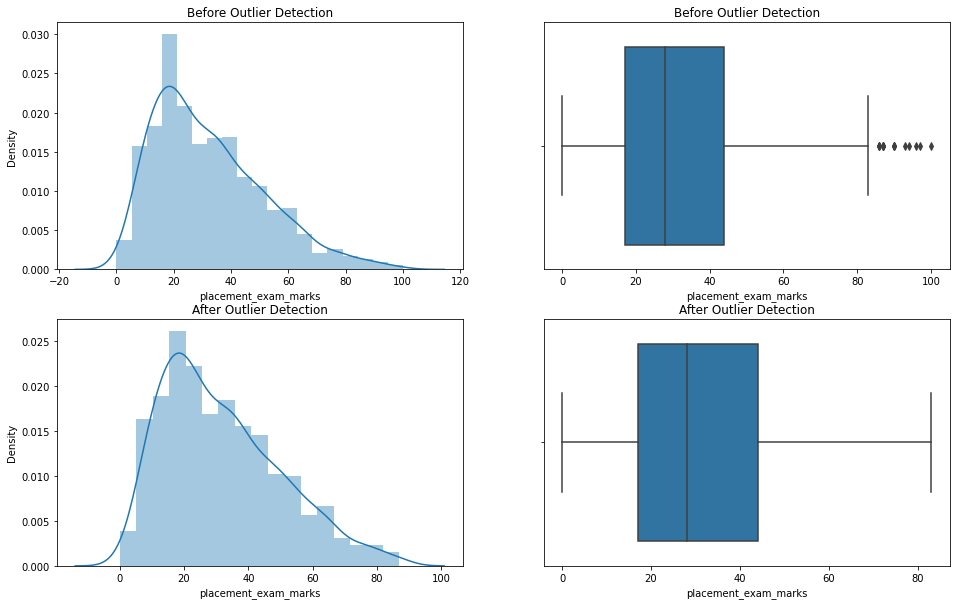

In [46]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.distplot(df['placement_exam_marks'], kde=True)
plt.title('Before Outlier Detection')

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'], showfliers=True)
plt.title('Before Outlier Detection')

plt.subplot(2, 2, 3)
sns.distplot(df[~df.isin(outliers)].dropna()['placement_exam_marks'], kde=True)
plt.title('After Outlier Detection')

plt.subplot(2, 2, 4)
sns.boxplot(df['placement_exam_marks'], showfliers=False)
plt.title('After Outlier Detection')

plt.show()

In [47]:
lower_percentile = df['placement_exam_marks'].quantile(0.25)
upper_percentile = df['placement_exam_marks'].quantile(0.75)
iqr = upper_percentile - lower_percentile

lower_limit = lower_percentile - 1.5 * iqr
upper_limit = upper_percentile + 1.5 * iqr

outliers = df[(df['placement_exam_marks'] < lower_limit) | (df['placement_exam_marks'] > upper_limit)]



C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

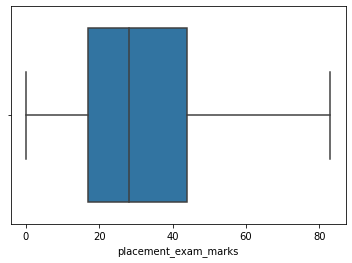

In [50]:
sns.boxplot(df['placement_exam_marks'], showfliers=False)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

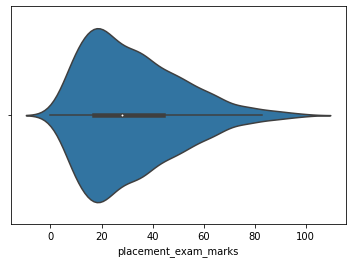

In [51]:
sns.violinplot(df['placement_exam_marks'], showfliers=False)